You just got hired as the first and only data practitioner at a small business experiencing exponential growth. The company needs more structured processes, guidelines, and standards. Your first mission is to structure the human resources data. The data is currently scattered across teams and files and comes in various formats: Excel files, CSVs, JSON files...

You'll work with the following data in the `datasets` folder:
- __Office addresses__ are currently saved in `office_addresses.csv`. If the value for office is `NaN`, then the employee is remote. 
- __Employee addresses__ are saved on the first tab of `employee_information.xlsx`.
- __Employee emergency contacts__ are saved on the second tab of `employee_information.xlsx`; this tab is called `emergency_contacts`. However, this sheet was edited at some point, and the headers were removed! The HR manager let you know that they should be: `employee_id`, `last_name`, `first_name`, `emergency_contact`, `emergency_contact_number`, and `relationship`.
- __Employee roles, teams, and salaries__ have been exported from the company's human resources management system into a JSON file titled `employee_roles.json`. Here are the first few lines of that file:
```
{"A2R5H9":
  {
    "title": "CEO",
    "monthly_salary": "$4500",
    "team": "Leadership"
  },
 ...
}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import pandas
import pandas as pd

<h1>1. LENDO OS ARQUIVOS.</h1>

In [ ]:
office_adresses = pd.read_csv("/content/drive/MyDrive/office_addresses (1).csv")

em_addresses = pd.read_excel("/content/drive/MyDrive/employee_information.xlsx", usecols= ["employee_id","employee_country","employee_city","employee_street","employee_street_number"])

em_emergencycontacts = pd.read_excel("/content/drive/MyDrive/employee_information.xlsx", sheet_name="emergency_contacts",header=None,names=["employee_id", "last_name", "first_name","emergency_contact", "emergency_contact_number", "relationship"])

em_roles = pd.read_json("/content/drive/MyDrive/employee_roles.json", orient="index")



<h1>2. JUNTANDO TODOS EM UM ÚNICO DATASET.</h1>

In [ ]:
employees = em_addresses.merge(office_adresses, left_on="employee_country", right_on="office_country", how="left")

employees = employees.merge(em_roles, left_on="employee_id", right_on=em_roles.index)

employees = employees.merge(em_emergencycontacts, on="employee_id")

<h1>3. SUBSTITUINDO O LOCAL DE TRABALHO VAZIO POR "REMOTO"</h1>

In [ ]:
employees = employees.fillna("Remote")

<h1>4. DEFININDO O ID DO COLABORADOR COMO INDEX</h1>

In [ ]:
employees = employees.set_index("employee_id")

<h1>5. REORGANIZANDO COLUNAS NA ORDEM DESEJADA</h1>

In [ ]:
employees = employees.reindex(columns=["first_name","last_name", "employee_country", "employee_city", "employee_street", "employee_street_number", "emergency_contact", "emergency_contact_number", "relationship", "monthly_salary", "team", "title", "office", "office_country", "office_city", "office_street", "office_street_number"])

<h1>6. ADICIONANDO TUDO ISSO AO DATA SET COM O NOME DESEJADO</h1>

In [ ]:
employees_final = employees

employees_final

,first_name,last_name,employee_country,employee_city,employee_street,employee_street_number,emergency_contact,emergency_contact_number,relationship,monthly_salary,team,title,office,office_country,office_city,office_street,office_street_number
employee_id,,,,,,,,,,,,,,,,,
A2R5H9,Jax,Hunman,BE,Leuven,Grote Markt,9,Opie Hurst,+32-456-5556-84,Brother,$4500,Leadership,CEO,Leuven Office,BE,Leuven,Martelarenlaan,38.0
H8K0L6,Tara,Siff,GB,London,Baker Street,221,Wendy de Matteo,+44-020-5554-333,Sister,$4500,Leadership,CFO,WeWork Office,GB,London,Old Street,207.0
G4R7V0,Gemma,Sagal,US,New-York,Perry Street,66,John Newmark,+1-202-555-194,Husband,$3000,Sales,Business Developer,ESB Office,US,New York City,Fifth Avenue,350.0
M1Z7U9,Tig,Coates,FR,Paris,Rue de l'Université,7,Venus Noone,+1-202-555-0130,Wife,$2000,People Operations,Office Manager,Remote,Remote,Remote,Remote,Remote


<h1>**PARTE DO MOODLE**</h1>

<H1>1.QUAL A DISTRIBUIÇAO DE FREQUENCIAS?</H1>

In [ ]:
employees_final.dtypes

first_name                  object
last_name                   object
employee_country            object
employee_city               object
employee_street             object
employee_street_number       int64
emergency_contact           object
emergency_contact_number    object
relationship                object
monthly_salary              object
team                        object
title                       object
office                      object
office_country              object
office_city                 object
office_street               object
office_street_number        object
dtype: object

In [ ]:
#Categoricas
cat = ["employee_country","employee_city","employee_street","employee_street_number","emergency_contact","emergency_contact_number","relationship","team","title","office","office_country","office_city","office_street","office_street_number"]
employees_final[cat]= employees_final[cat].astype("category")

freq = employees_final[cat].value_counts()
print(freq)


#Quantitativas
quant = ["monthly_salary"]
    
#employees_final["monthly_salary"] = employees_final["monthly_salary"].str[1:].astype("float64")
quantitativas = employees_final["monthly_salary"].value_counts()


employee_country  employee_city  employee_street      employee_street_number  emergency_contact  emergency_contact_number  relationship  team               title               office         office_country  office_city    office_street   office_street_number
BE                Leuven         Grote Markt          9                       Opie Hurst         +32-456-5556-84           Brother       Leadership         CEO                 Leuven Office  BE              Leuven         Martelarenlaan  38.0                    1
FR                Paris          Rue de l'Université  7                       Venus Noone        +1-202-555-0130           Wife          People Operations  Office Manager      Remote         Remote          Remote         Remote          Remote                  1
GB                London         Baker Street         221                     Wendy de Matteo    +44-020-5554-333          Sister        Leadership         CFO                 WeWork Office  GB              London

<Axes: >

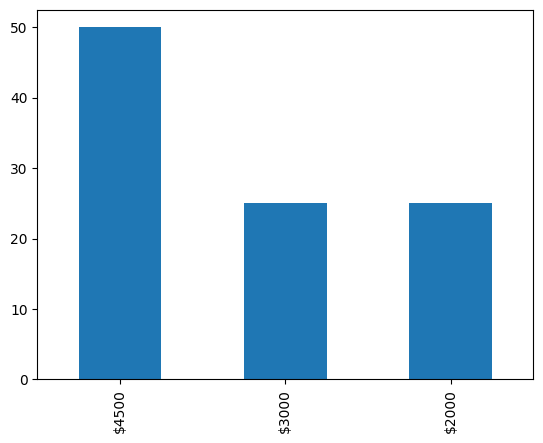

In [ ]:
monthly_salary = employees_final["monthly_salary"]
monthly_salary = monthly_salary.value_counts(normalize= True)*100
monthly_salary.plot.bar()



<Axes: >

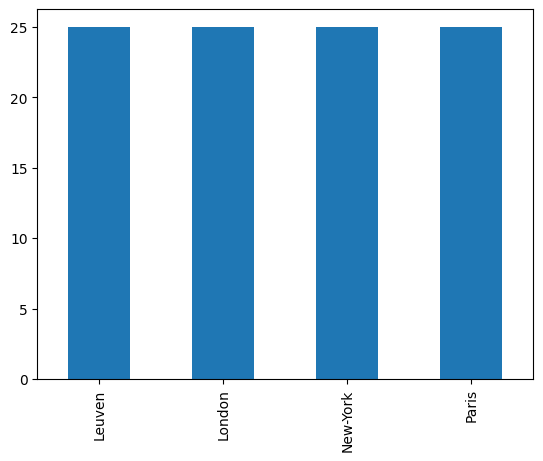

In [ ]:
emloyee_city = employees_final["employee_city"]
emloyee_city = emloyee_city.value_counts(normalize= True)*100
emloyee_city.plot.bar()

<Axes: >

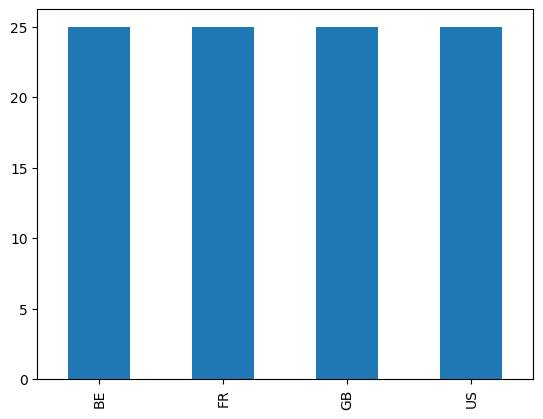

In [ ]:
employee_country = employees_final["employee_country"]
employee_country = employee_country.value_counts(normalize= True)*100
employee_country.plot.bar()

<Axes: >

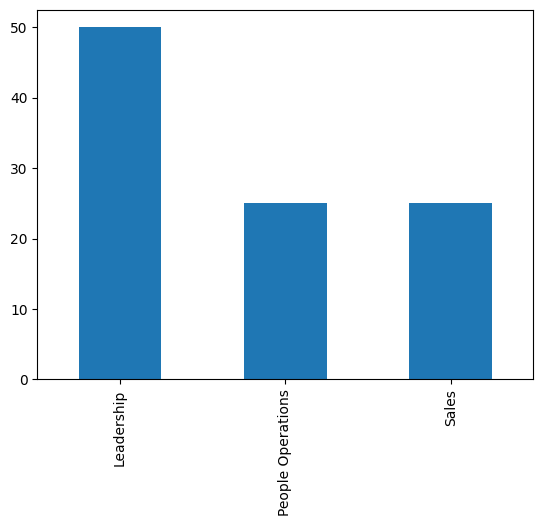

In [ ]:
team = employees_final["team"]
team = team.value_counts(normalize= True)*100
team.plot.bar()

<Axes: >

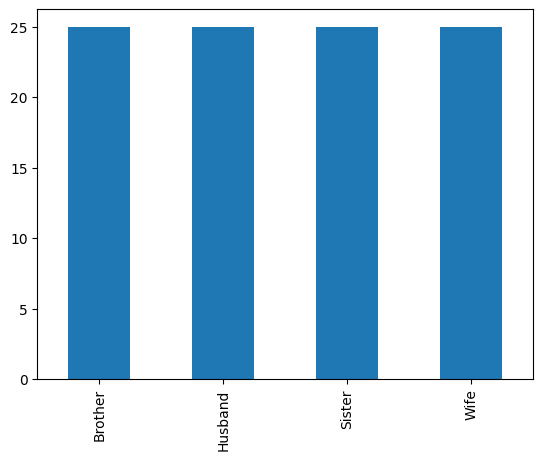

In [ ]:
relationship = employees_final["relationship"]
relationship = relationship.value_counts(normalize= True)*100
relationship.plot.bar()

<h1>3. PERGUNTAS QUE PODEM SER RESPONDIDAS:</h1>
<OL>
  <LI>Qual a média salarial com base em Cidade ou Estado</LI>
  <LI>Qual o salário com base no cargo.</LI>
  <LI>Qual a porcentagens de colaboradores trabalham em HomeOffice</LI>
</OL>